In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

# Fitting Models to Data with `scipy.optimize.curve_fit`

The [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit) function uses non-linear least squares minimization to fit a function to data (making use of the `least_squares` function). Though we demonstrated how to do this on the previous page using the `least_squares` function, the `curve_fit` function is far more convenient to use for this purpose.

The call signature of `curve_fit` (including only the arguments of immediate interest to us) is:

```python
curve_fit(f, xdata, ydata, p0=None, sigma=None, ..., bounds=(- np.inf, np.inf))
```

where

- `f` is the function for the model being fitted to the data, i.e. $y = f(x, \vec{a})$. It has the call signature `f(xdata, *params)`, where `params` are the model parameters which need to be found for the fit (in our previous notation, the $a_j$ values).
- `xdata` is the data for the independent variable.
- `ydata` is the data for the dependent variable.
- `p0` is the initial guess for the model parameters ($a_j$).
- `sigma` is the uncertainty in the `ydata`. If this is not `None`, then `curve_fit` will use $\chi^2$ minimization.
- `bounds` is a tuple of 2 arrays for the lower and upper bounds of the parameters (the same use as in `least_squares`).

The `curve_fit` function returns a tuple where the first element is an array of the values for the model parameters which best fit the data.

<!--
The `curve_fit` function returns a tuple with the elements:

- `popt`: array of the values for the model parameters which best fit the data.
- `pcov`: the estimated 
-->

<div class="worked-example">
    <h5 class="worked-example-title"><b>Worked Example</b></h5>

Let's use `curve_fit` to fit the previous functional relation:

\begin{align*}
y &= a_0 + a_1 e^{a_2 x}\\
  &= f(x; \vec{a}) 
\end{align*}

to the **nonlinear_data.csv** data.

Unlike when using `least_squares`, we don't have to define the residual function, only the functional relation:

```Python
def f(x, a):
    return a[0] + a[1] * np.exp(a[2] * x)
```

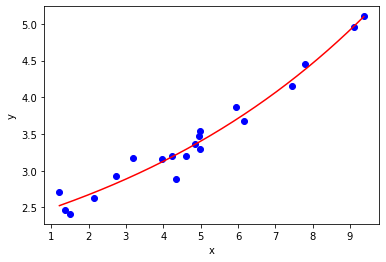

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#importing scipy.optimize.leastsq only
from scipy.optimize import curve_fit

#The model to fit to the data
def f(x, *a):
    return a[0] + a[1] * np.exp(a[2] * x)

#Reading the data
# The `unpack` keyword argument seperates the columns into individual arrays 
xdata, ydata = np.loadtxt('data/nonlinear_data.csv', delimiter = ',', unpack = True) 

#Performing the fit
a0 = [1.5, 0.6, 0.2] #initial guess

fit = curve_fit(f, xdata, ydata, a0)

#Plotting the fit and data
x = np.linspace(xdata.min(), xdata.max(), 1000)

plt.plot(xdata, ydata, 'bo')
plt.plot(x, f(x, *fit[0]), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

</div>